# Задачи по статистике в R

Различные задачи по языку R и  статистике в R:
- [Основы программирования на R](https://stepik.org/course/497)
- [Анализ данных в R на Stepik](https://stepik.org/course/129/)

Данные приводятся исключительно для ознакомления в качестве личного конспекта. Перед решениями не стоит задачи строгого соответствия вопросам упомянутых курсов.

---
# Синтаксис языка R: Факторы и строки

**Задача**. Превратите количественную переменную `mag` (сила землетрясения в баллах по шкале Рихтера) датафрейма `quakes` в качественную. Интервалы должны быть длиной в полбалла, начиная с минимального, при этом левый конец интервала включается. Далее отсортируйте общее количество случаев, попавших в каждую категорию, в порядке убывания.

In [1]:
t <- cut(quakes$mag, breaks = 0.5*(8:13), right=F)
sort(table(t), decreasing = T)

t
[4.5,5) [4,4.5) [5,5.5) [5.5,6) [6,6.5) 
    425     377     160      33       5 

**Задача**. Найдите самый высокий экземпляр вида в датасете, записанном в файле `avianHabitat.csv` для каждого из исследователей (`Observer`). Высота видов записывается в полях, содержащих в конце названия `Ht` (сокр от Height). 

In [2]:
avian <- read.csv('datasets/avianHabitat.csv')
sapply(avian[, grepl("Ht", names(avian))], function(name) {tapply(name, avian$Observer, max)})

,DBHt,WHt,EHt,AHt,HHt,LHt
JT,9.9,24.5,5.3,31.5,8.2,0.8
RA,10.0,18.5,4.9,19.2,7.5,1.3
RR,5.0,22.0,4.2,0.2,7.3,1.1


# Синтаксис языка R: Функции

**Задача**. Напишите функцию, которая выводит номера позиций пропущенных наблюдений в векторе. На вход функция получает числовой вектор с пропущенными значениями. Функция возвращает новый вектор с номерами позиций пропущенных значений.

In [3]:
my_vector <- c(1, 2, 3, NA, NA)
NA.position <- function(x){
    res <- which(is.na(x))
    return(res)
}

print(NA.position(my_vector))

[1] 4 5


**Продолжение**. Напишите функцию `NA.counter` для подсчета пропущенных значений в векторе.

На вход функция `NA.counter` должна принимать один аргумент – числовой вектор. Функция должна возвращать количество пропущенных значений.

In [4]:
NA.counter <- function(x){
    res <- sum(is.na(x))
    return(res)
}

print(NA.counter(my_vector))

[1] 2


**Задача**. Напишите функцию `filtered.sum`, которая на вход получает вектор с пропущенными, положительными и отрицательными значениями и возвращает сумму положительных элементов вектора.

In [5]:
my_vector <- c(1, -2, 3, NA, NA)
filtered.sum <- function(x) {
    return(sum(x[x > 0], na.rm = T))
}

print(filtered.sum(my_vector))

[1] 4


**Задача на выбросы**. Напишите функцию `outliers.rm`, которая находит и удаляет выбросы. Для обнаружения выбросов воспользуемся самым простым способом, с которым вы не раз встречались, используя график `box plot`. 

Выбросами будем считать те наблюдения, которые отклоняются от 1 или 3 квартиля более, чем на `1,5 *  IQR`, где  `IQR` – межквартильный размах.

На вход функция получает числовой вектор `x`. Функция должна возвращать модифицированный вектор `x` с удаленными выбросами.

In [6]:
x = c(-10, -2, -1, 1, 2, 3, 100)

outliers.rm <- function(x){    
    q <- quantile(x, 0.25) + quantile(x, 0.75)    
    return(x[abs(x - q/2) <= 2*IQR(x)])
}

outliers.rm(x)

[1] -2 -1  1  2  3

**Задача**. Функция `scale()` позволяет совершить стандартизацию вектора, то есть делает его среднее значение равным нулю, а стандартное отклонение – единице (Z-преобразование).

Стандартизованный коэффициент регрессии ($\beta$) можно получить, если предикторы и зависимая переменная стандартизованы.

Напишите функцию `beta.coef`, которая на вход получает $dataframe$ с двумя количественными переменными, а возвращает стандартизованные коэффициенты для регрессионной модели, в которой первая переменная датафрейма выступает в качестве зависимой, а вторая в качестве независимой.

In [58]:
beta.coef <- function(x){    
    x <-scale(x)    
    return(lm(x[,1] ~ x[,2])$coefficients)
}

In [59]:
beta.coef(mtcars[,c(1,3)])
beta.coef(swiss[,c(1,4)])

(Intercept)        x[, 2] 
-7.378620e-17 -8.475514e-01

(Intercept)        x[, 2] 
 4.235640e-16 -6.637889e-01

**Задача**. Напишите функцию `normality.test`, которая получает на вход dataframe с количественными переменными, проверяет распределения каждой переменной на нормальность с помощью функции `shapiro.test`. Функция должна возвращать вектор с значениями `p-value`, полученного в результате проверки на нормальность каждой переменной. Названия элементов вектора должны совпадать с названиями переменных. 



# Анализ номинативных данных

---
**Задача**. Воспользуемся данными diamonds из библиотеки `ggplot2`. При помощи критерия Хи-квадрат проверьте гипотезу о взаимосвязи качества огранки бриллианта (`сut`) и его цвета (`color`). В переменную `main_stat` сохраните значение статистики критерия Хи-квадрат.

In [7]:
# install.packages("ggplot2")
library(ggplot2)
options(repr.plot.width = 5, repr.plot.height = 2.5, repr.plot.res = 100)

diamonds_table <- table(diamonds$cut, diamonds$color)    
chi_result <- chisq.test(diamonds_table )    
main_stat <- chi_result$statistic

Warning message:
“package ‘ggplot2’ was built under R version 3.6.3”


In [8]:
chi_result


	Pearson's Chi-squared test

data:  diamonds_table
X-squared = 310.32, df = 24, p-value < 2.2e-16


In [9]:
main_stat

X-squared 
 310.3179

---
**Задача**. Вновь воспользуемся данными `diamonds` из библиотеки `ggplot2`. При помощи критерия Хи-квадрат проверьте гипотезу о взаимосвязи цены (`price`) и каратов (`carat`) бриллиантов. Для этого сначала нужно перевести эти количественные переменные в формат пригодный для Хи-квадрат. Создайте две новые переменные в данных `diamonds`:

- `factor_price` - 1, если значение цены больше либо равно, чем среднее, и 0, если значение цены ниже среднего цены по выборке.
- `factor_carat` - 1, если число карат больше либо равно, чем среднее, и 0, если ниже среднего числа карат по выборке.

Важный момент - на больших данных цикл for() работает довольно медленно, постарайтесь решить эту задачу без его использования!
Используя эти шкалы при помощи Хи-квадрат проверьте исходную гипотезу. Сохраните в переменную `main_stat` значение критерия  Хи-квадрат.

Пример перевода количественной шкалы в номинативную:

```R
> x <- (1, 2, 3, 5, 6, 7) # mean(x) = 4
> factor_x <- (0, 0, 0, 1, 1, 1)
```

In [10]:
factor_price <- ifelse(diamonds$price >= mean(diamonds$price), 1, 0)
factor_carat <- ifelse(diamonds$carat >= mean(diamonds$carat), 1, 0)
diamonds_table <- table(factor_price, factor_carat)
chi_result <- chisq.test(diamonds_table )    
main_stat <- chi_result$statistic
main_stat

X-squared 
 40735.22

**Задача**. При помощи точного критерия Фишера проверьте гипотезу о взаимосвязи типа коробки передач (`am`) и типа двигателя (`vs`) в данных `mtcars`.

In [11]:
fisher.test(table(mtcars$am, mtcars$vs))$p

[1] 0.4726974

# Сравнение двух групп

Рассмотрим t-критерий на примере датасета `iris`. Выделим два вида.

In [12]:
df <- subset(iris, Species != 'setosa')
table(df$Species)


    setosa versicolor  virginica 
         0         50         50 

Проверим форму распределений.

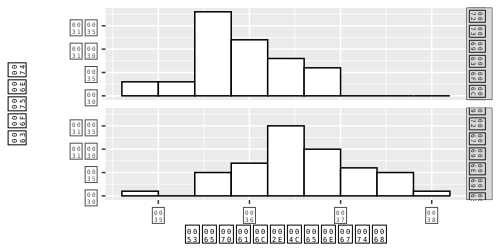

In [13]:
ggplot(df, aes(x = Sepal.Length)) +
geom_histogram(fill="white",
               col="black", 
               binwidth=0.4) +
facet_grid(Species ~ .)

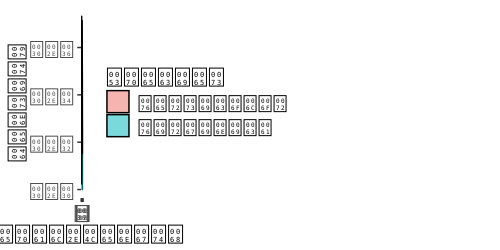

In [14]:
ggplot(df, aes(Sepal.Length, fill = Species )) +
geom_density(alpha = 0.5)

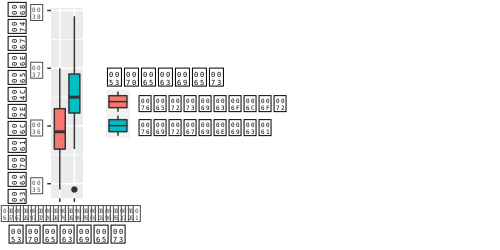

In [15]:
ggplot(df, aes(Species, Sepal.Length, fill = Species )) +
geom_boxplot()

Видим приблизительно симметричные, близкие к нормальным распределения, гомогенные. Проверим эти предположения с помощью тестов.

Сначала проверим нормальность с помощью [критерия Шапиро-Уилка](https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B8_%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D0%B8).

In [16]:
shapiro.test(df$Sepal.Length)


	Shapiro-Wilk normality test

data:  df$Sepal.Length
W = 0.98054, p-value = 0.1464


In [17]:
shapiro.test(df$Sepal.Length[df$Species == "versicolor"])


	Shapiro-Wilk normality test

data:  df$Sepal.Length[df$Species == "versicolor"]
W = 0.97784, p-value = 0.4647


In [18]:
shapiro.test(df$Sepal.Length[df$Species == "virginica"])


	Shapiro-Wilk normality test

data:  df$Sepal.Length[df$Species == "virginica"]
W = 0.97118, p-value = 0.2583


Проверим гомогенность дисперсии по [критерию Бартлетта](https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%91%D0%B0%D1%80%D1%82%D0%BB%D0%B5%D1%82%D1%82%D0%B0).

In [19]:
bartlett.test(Sepal.Length ~ Species, df)


	Bartlett test of homogeneity of variances

data:  Sepal.Length by Species
Bartlett's K-squared = 2.0949, df = 1, p-value = 0.1478


Данные проверили, теперь выполним сам t-тест.

In [20]:
t_test <- t.test(Sepal.Length ~ Species, df)

In [21]:
t_test$p.value

[1] 1.866144e-07

Тест пройден.

Рассмотрим ситуацию для парной выборки:

In [22]:
t.test(df$Petal.Length,
       df$Petal.Width,
       paired = T)


	Paired t-test

data:  df$Petal.Length and df$Petal.Width
t = 60.552, df = 99, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.124156 3.335844
sample estimates:
mean of the differences 
                   3.23 


# Памятка
t-Критерий Стьюдента для независимых выборок

```
t.test(Var1 ~ Var2, data) # если первая переменная количественная, а вторая фактор
t.test(data$Var1, data$Var2) # если обе переменные количественные
```

t-Критерий Стьюдента для зависимых выборок

```
t.test(data$Var1, data$Var2, paired = T)
```

Проверка на нормальность распределения

```
shapiro.test(Var1) # проверка на нормальность распределения переменной Var1
# но не удобно когда есть группирующая факторная переменная
```

Поможет функция by(), которая применяет различные функции на каждом уровне фактора.  

```
by(iris$Sepal.Length, INDICES = iris$Species, shapiro.test) # проверка на нормальность переменной 
# Sepal.Length в трех разных группах в соответствии с переменной Species
```

Проверка на гомогенность дисперсий

```
bartlett.test(mpg ~ am, mtcars) #Критерий Бартлетта
```

---
**Задача про свинок**. Воспользуемся встроенным набором данных в R - `ToothGrowth`. Данные позволяют исследовать рост зубов у морских свинок в зависимости от дозировки витамина C и типа потребляемых продуктов.

Сравните среднее значение длины зубов свинок, которые потребляли апельсиновый сок (OJ) с дозировкой 0.5 миллиграмм, со средним значением длины зубов свинок, которые потребляли аскорбиновую кислоту (VC) с дозировкой 2 миллиграмма. 

Значение t-критерия сохраните в переменную `t_stat`.

In [23]:
data <- subset(ToothGrowth, supp=='OJ' & dose==0.5 | supp=='VC' & dose==2)    
t_stat <- t.test(len ~ supp, data)$statistic

In [24]:
t_stat

t 
-6.232482

# Применение дисперсионного анализа

**Задача на взаимодействие переменных**. Воспользуемся встроенными данными `npk`, иллюстрирующими влияние применения различных удобрений на урожайность гороха (`yield`). Нашей задачей будет выяснить, существенно ли одновременное применение азотных (фактор N) и фосфатных (фактор P) удобрений. Примените дисперсионный анализ, где будет проверяться влияние фактора применения азотных (N), влияние фактора применения фосфатных (P) удобрений и их взаимодействие.

In [25]:
head(npk)

,block,N,P,K,yield
,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1,0,1,1,49.5
2,1,1,1,0,62.8
3,1,0,0,0,46.8
4,1,1,0,1,57.0
5,2,1,0,0,59.8
6,2,1,1,1,58.5


In [26]:
fit <- aov(yield ~ N * P, data=npk)
summary(fit)

cat("Оценка влияния фактора взаимодействия Pr(>F):",
    summary(fit)[[1]]["N:P", "Pr(>F)"])

            Df Sum Sq Mean Sq F value Pr(>F)  
N            1  189.3  189.28   5.758 0.0263 *
P            1    8.4    8.40   0.256 0.6187  
N:P          1   21.3   21.28   0.647 0.4305  
Residuals   20  657.4   32.87                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Оценка влияния фактора взаимодействия Pr(>F): 0.4304878

**Задача на попарные сравнения**. Проведите однофакторный дисперсионный анализ на встроенных данных `iris`. Зависимая переменная – ширина чашелистика (`Sepal.Width`), независимая переменная – вид (`Species`). Затем проведите попарные сравнения видов. Какие виды статистически значимо различаются по ширине чашелистика (`p < 0.05`)?

In [27]:
fit <- aov(Sepal.Width ~ Species, data=iris)
summary(fit)

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  11.35   5.672   49.16 <2e-16 ***
Residuals   147  16.96   0.115                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [28]:
TukeyHSD(fit)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Sepal.Width ~ Species, data = iris)

$Species
                       diff         lwr        upr     p adj
versicolor-setosa    -0.658 -0.81885528 -0.4971447 0.0000000
virginica-setosa     -0.454 -0.61485528 -0.2931447 0.0000000
virginica-versicolor  0.204  0.04314472  0.3648553 0.0087802


Все три вида статистически значимо различаются по ширине чашелистика.

**Задача на использование данных от одних тех же пациентов**. В этой задаче вам дан набор данных (datasets/Pilukin.csv), в котором представлена информация о температуре нескольких пациентов, которые лечатся разными таблетками и у разных врачей.

Проведите однофакторный дисперсионный анализ с повторными измерениями: влияние типа таблетки (`pill`) на температуру (`temperature`) с учётом испытуемого (`patient`). Каково p-value для влияния типа таблеток на температуру?

In [29]:
data <- read.csv('datasets/Pillulkin.csv')
data$patient <- as.factor(data$patient)


In [30]:
fit <- aov(temperature ~ pill + Error(patient/pill), data=data)
summary(fit)


Error: patient
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  9  42.82   4.758               

Error: patient:pill
          Df Sum Sq Mean Sq F value Pr(>F)
pill       1  0.133   0.133   0.051  0.826
Residuals  9 23.479   2.609               

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 20  87.51   4.375               

Дисперсионный анализ учитывает различия как между разными группами, так и внутри одной группы. Когда вы вводите испытуемых, то как бы разбиваете все данные помимо групп по цене и типам терапии также еще и по испытуемым, и учитываете вариативность относительно каждого испытуемого, которая вносится в общую вариативность.

**Продолжение задачи**. Теперь вашей задачей будет провести двухфакторный дисперсионный анализ с повторными измерениями: влияние факторов `doctor`, влияние фактора `pill` и их взаимодействие на `temperature`. Учтите обе внутригрупповые переменные: и тот факт, что один и тот же больной принимает разные таблетки, и тот факт, что один и тот же больной лечится у разных врачей! Каково F-значение для взаимодействия факторов доктора (`doctor`) и типа таблеток (`pill`)?

In [31]:
summary(aov(temperature ~ pill*doctor +
            Error(patient/(doctor+pill)),
            data=data))[[4]]

            Df Sum Sq Mean Sq F value Pr(>F)
pill:doctor  1  0.422  0.4215   0.146  0.711
Residuals    9 26.014  2.8905               

# Корреляция и простая линейная регрессия (МНК)

**Задача**. Напишите функцию `corr.calc`, которая на вход получает `data.frame` с двумя количественными переменными, рассчитывает коэффициент корреляции Пирсона и возвращает вектор из двух значений: коэффициент корреляции и p – уровень значимости.

In [32]:
corr.calc <- function(df) {
    test_result <- cor.test(x = df[[1]], y = df[[2]])
    return(c(test_result$estimate, test_result$p.value))
}

In [33]:
corr.calc(mtcars[, c(1,5)])

cor              
0.6811719078 0.0000177624

**Задача**. Напишите функцию `filtered.cor` которая на вход получает `data.frame` с  произвольным количеством переменных (как количественными, так и любых других типов), рассчитывает коэффициенты корреляции Пирсона между всеми парами количественных переменных и возвращает наибольшее по модулю значение коэффициента корреляции. 

Гарантируется наличие в data.frame хотя бы двух количественных переменных.

Данные для тренировки: https://stepic.org/media/attachments/lesson/11504/step6.csv

In [34]:
df <- read.table("https://stepic.org/media/attachments/lesson/11504/step6.csv",  header=TRUE, sep=',')

In [35]:
install.packages("psych", repos='http://cran.us.r-project.org')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [36]:
library(psych)

filtered.cor <- function(df) {
    # находим столбцы, в которых хранятся численные значения
    nums <- unlist(lapply(df, is.numeric))  
    
    # находим коэффициенты корреляции
    fit <- corr.test(df[nums])
    res <- fit$r
    
    # обнуляем диагональ
    # (макс. корреляция у признака с самим собой)
    diag(res) <- 0
    
    # находим координату максимального по модулю значения
    coord <- which.max(abs(res))
    return(res[coord])
}

filtered.cor(df)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




[1] 0.235997

**Задача**. Напишите функцию `smart_cor`, которая получает на вход `dataframe` с двумя количественными переменными. Проверьте с помощью теста Шапиро-Уилка, что данные в обеих переменных принадлежат нормальному распределению.

Если хотя бы в одном векторе распределение переменной отличается от нормального (`p-value` меньше 0.05), то функция должна возвращать коэффициент корреляции Спирмена.

Если в обоих векторах распределение переменных от нормального значимо не отличается, то функция должна возвращать коэффициент корреляции Пирсона.

In [37]:
test_data <- read.csv("https://stepik.org/media/attachments/course/129/test_data.csv")

smart_cor <- function(x){
    if (shapiro.test(x[[1]])$p.value < 0.05 | shapiro.test(x[[2]])$p.value < 0.05) {
        res <- cor.test(x[[1]], x[[2]], method = "spearman")$estimate
    } else {
        res <- cor.test(x[[1]], x[[2]])$estimate
    }
    return(res)
}

smart_cor(test_data)

cor 
-0.1031003

**Задача**. Набор данных – dataframe с двумя количественными переменными `dataset_11508.txt`. Постройте линейную регрессию, где первая переменная – зависимая, вторая – независимая. В ответе укажите значения регрессионных коэффициентов сначала `intercept` затем `slope`.

In [38]:
t <- read.csv("datasets/dataset_11508.txt", sep = "", head = F, dec = '.') 
lr <- lm(V1 ~ V2, t)
lr$coefficients

(Intercept)          V2 
  -8.182094    1.976514

**Задача**. Воспользуемся данными `diamonds` из библиотеки `ggplot2`. Только для бриллиантов класса `Ideal` (переменная `cut`) c числом карат равным `0.46` (переменная `carat`) постройте линейную регрессию, где в качестве зависимой переменной выступает `price`, в качестве предиктора – переменная `depth`. Сохраните коэффициенты регрессии в переменную `fit_coef`.

In [39]:
data_for_model <- subset(diamonds, cut == 'Ideal' & carat == 0.46)    
fit <- lm(price ~ depth, data_for_model)    
fit_coef <- fit$coefficients
fit_coef

(Intercept)       depth 
  -76.11030    21.43427

**Задача**. Напишите функцию `regr.calc`, которая на вход получает dataframe c двумя переменными.

Если две переменные значимо коррелируют (p-уровень значимости для коэффициента корреляции Пирсона меньше 0.05), то функция строит регрессионную модель, где первая переменная – зависимая, вторая – независимая. Затем создает в dataframe новую переменную с назанием `fit`, где сохраняет предсказанные моделью значения зависимой переменной. В результате функция должна возвращать исходный dataframe с добавленной новой переменной `fit`.

Если две переменные значимо не коррелируют, то функция возвращает строчку `"There is no sense in prediction"`.

In [40]:
regr.calc <- function(x) {
    if(cor.test(x[[1]], x[[2]])$p.value < 0.05){
        x$fit <- lm(x[[1]] ~ x[[2]], x)$fitted.values
        return(x)
    } else {
    return("There is no sense in prediction")
    }
}

In [41]:
regr.calc(iris[,1:2])

[1] "There is no sense in prediction"

In [42]:
head(regr.calc(iris[,c(1,4)]), 10)

,Sepal.Length,Petal.Width,fit
,<dbl>,<dbl>,<dbl>
1,5.1,0.2,4.955345
2,4.9,0.2,4.955345
3,4.7,0.2,4.955345
4,4.6,0.2,4.955345
5,5.0,0.2,4.955345
6,5.4,0.4,5.133062
7,4.6,0.3,5.044203
8,5.0,0.2,4.955345
9,4.4,0.2,4.955345


# Памятка

```
cor.test(mtcars$mpg, mtcars$disp) # Расчет корреляции Пирсона 

cor.test(~ mpg + disp, mtcars) # запись через формулу

cor.test(mtcars$mpg, mtcars$disp, method = "spearman") # Расчет корреляции Спирмена 

cor.test(mtcars$mpg, mtcars$disp, method = "kendall") # Расчет корреляции Кендала 

cor(iris[, -5]) # построение корреляционной матрицы

fit <- lm(mpg ~ disp, mtcars) # построение линейной регрессии 

fit$coefficients # коэффициенты регрессии 

fit$fitted.values # предсказанные значения зависимой переменной 
```

При наличии одинаковых значений в переменных расчет непараметрических корреляций будет сопровождаться предупреждением о невозможности рассчитать точное значение p - value.

Если в ваших данных есть одинаковые наблюдения, но вы хотите рассчитать непараметрическую корреляцию, используйте функцию spearman_test  из пакета coin

```R
library(coin)
spearman_test(~ mpg + disp, mtcars)
```

Обратите внимание на различия в графиках. То что в первом aes() будет распространяться на все слои. А то, что в aes() конкретного geom - только на него.

```R
ggplot(mtcars, aes(mpg, disp, col = factor(am)))+
  geom_point()+
  geom_smooth()

ggplot(mtcars, aes(mpg, disp))+
  geom_point(aes(col = factor(am)))+
  geom_smooth()

ggplot(mtcars, aes(mpg, disp))+
  geom_point()+
  geom_smooth(aes(col = factor(am)))
```

# Множественная линейная регрессия

**Задача**. Напишите функцию `fill_na`, которая принимает на вход данные с тремя переменными:
- $x_1$ — числовой вектор
- $x_2$ — числовой вектор
- $y$ — числовой вектор с пропущенными значениями.

На первом этапе, используя только наблюдения, в которых нет пропущенных значений, постройте регрессионную модель (без взаимодействий), где  $y$ — зависимая переменная, $x_1$ и $x_2$ — независимые переменные.

Затем, используя построенную модель, заполните пропущенные значения предсказаниями модели.

Функция должна возвращать dataframe c новой переменной `y_full`. Сохраните в нее переменную `y`, в которой пропущенные значения заполнены предсказанными значениями построенной модели.

In [43]:
test_data <- read.csv("https://stepic.org/media/attachments/course/129/fill_na_test.csv")

fill_na <- function(test_data){
    # находим линейную регрессию 
    r <- lm(y ~ x_1 + x_2, test_data)
    
    # копируем переменную
    y_full <- test_data$y
    
    # находим позиции пропущенных значений
    empty <- which(is.na(y_full))
    
    # и подставляем значения, соответствующие регрессии
    y_full[empty] <- predict(r, test_data)[empty]
    
    # добавляем переменную в датасет и возвращаем
    test_data$y_full <- y_full
    return(test_data)
}

fill_na(test_data)

x_1,x_2,y,y_full
<int>,<int>,<int>,<dbl>
9,22,14,14.00000
14,35,9,9.00000
10,45,NA,13.12727
6,35,NA,13.30132
11,36,16,16.00000
5,27,11,11.00000
9,34,NA,12.83632
6,25,NA,12.90783
11,38,13,13.00000


**Задача**. В переменной `df` сохранен subset данных `mtcars` только с переменными "wt", "mpg", "disp", "drat", "hp". Воспользуйтесь множественным регрессионным анализом, чтобы предсказать вес машины (переменная "wt"). Выберите такую комбинацию независимых переменных (из "mpg", "disp", "drat", "hp"), чтобы значение `R^2 adjusted` было наибольшим. Взаимодействия факторов учитывать не надо. 

In [44]:
df <- mtcars[c("wt", "mpg", "disp", "drat", "hp")]

In [45]:
ideal_model <- step(lm(wt ~ mpg + disp + hp, data = df),
                    direction = 'backward')

Start:  AIC=-56.88
wt ~ mpg + disp + hp

       Df Sum of Sq    RSS     AIC
<none>              4.2136 -56.877
- hp    1    0.6684 4.8820 -54.166
- mpg   1    1.9125 6.1261 -46.902
- disp  1    3.1058 7.3195 -41.206


In [46]:
summary(lm(wt ~ mpg + disp + hp, data = df))$adj.r.squared

[1] 0.8428136